<a href="https://colab.research.google.com/github/nicosaboonchi/Deep-Learning/blob/main/Classification_with_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello Deep Learning with MNSIT (Pytorch)

In this notebook I will be using computer vision to tackle the "Hello World" of deep learning using Pytorch.

The problem is to use neural networks to correctly classifiy images of handwritten digits with their corresponding numerical value.

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1. Getting the dataset

Our dataset, MNIST, contains 60,000 images that will be used to train the network with 10,000 test images to evaluate its preformance.

In [2]:
train_dataset = datasets.MNIST(root="data",
                               train=True,
                               download=True,
                               transform=ToTensor(),
                               target_transform=None)
test_dataset = datasets.MNIST(root="data",
                              train=False,
                              download=True,
                              transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 128403717.37it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 140855457.93it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26461068.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5774637.40it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### 1.1 Taking a look at some of the attributes of the dataset

The first thing to notice is how images appear to the computer. In this case they are 28x28 pixel images where each pixel is a numerical value with 1 being a white pixel and 0 being a black pixel and everything inbetween is a shade of gray.

I like to think of these values as a slider when editing pictures say in Adobe Lightroom, where when you increase the exposure, saturation, contrast, ect you are increasing these numerical vlaues to one side.

In [3]:
# look at the first sample of our dataset
image, label = train_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
classes = train_dataset.classes # these are the values of the images we are trying to recognize
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [5]:
# (Color channels, height, width)
image.shape

torch.Size([1, 28, 28])

In [6]:
# how many samples are there?
len(train_dataset.data), len(train_dataset.targets), len(test_dataset), len(test_dataset.targets)

(60000, 60000, 10000, 10000)

### 1.1 Plot the image

Text(0.5, 1.0, 'This is a: 5')

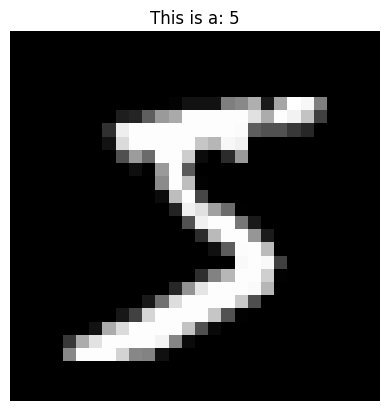

In [7]:
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
plt.title(f"This is a: {label}")

### 1.2 plot multiple images in a grid

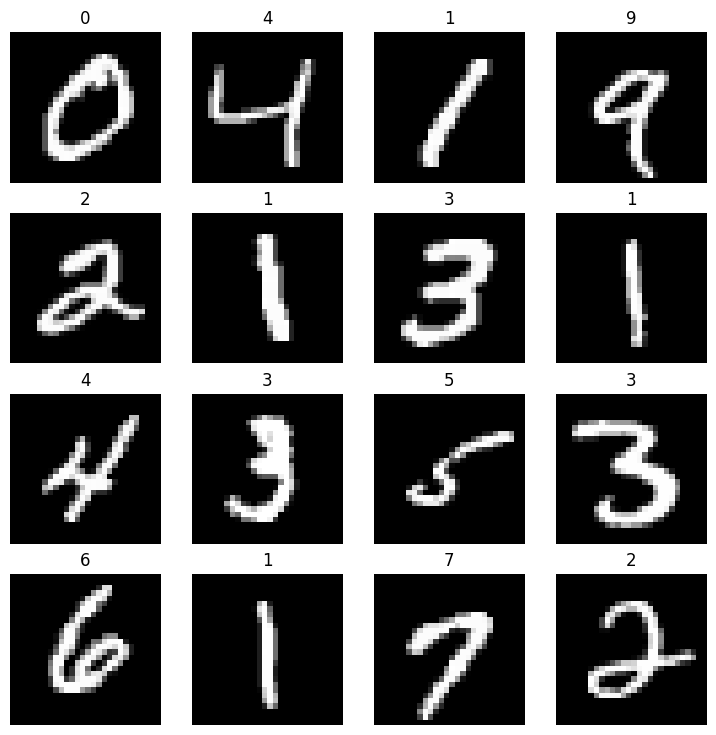

In [8]:
plt.figure(figsize=(9,9))

rows, columns = 4,4
for i in range(1, rows * columns + 1):
  plt.subplot(rows, columns, i)
  random_idx = torch.randint(low=0,
                         high=len(train_dataset),
                         size=[1])
  img, label = train_dataset[i]
  plt.imshow(img.squeeze(), cmap="gray")
  plt.axis(False)
  plt.title(label)

## Prepare the Dataloader

We will use a dataloader so that we can break up our 60,000 images into batches. We do this because the computers memory limitations. It's more easy for the computer to look at batches of 25 images at a time rather than all
60,000 in one hit

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 25

train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 2400 batches of 25
Length of test dataloader: 400 batches of 25


In [10]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Shape of train features: {train_features.shape}")
print(f"Shape of train labels: {train_labels.shape}")

Shape of train features: torch.Size([25, 1, 28, 28])
Shape of train labels: torch.Size([25])


## 1.1 plot using the dataloader

(-0.5, 27.5, 27.5, -0.5)

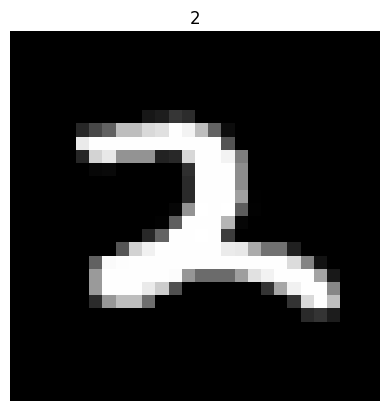

In [11]:
idx = torch.randint(0,
                    len(train_features),
                    size=[1])
plt.imshow(train_features[idx].squeeze(), cmap="gray")
plt.title(train_labels[idx].item())
plt.axis(False)

## Building Baseline Model

We will start with a very simple model using only linear layers and in future models try to out preform this model.

### Set Device agnostic code

We want to run our model on a GPU for faster computation


In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
!nvidia-smi

Sun Oct  1 22:57:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We will use a flatten layer and 2 linear layers,

`nn.Flatten()` Will flatten our 28x28 tensor into a one dimensional tensor of 784. This is needed to pass into the `nn.Linear()` layer.

In [14]:
class MNISTV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten tensor into one dimension
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(42)
model_0 = MNISTV0(input_shape=784,
                  hidden_units=10,
                  output_shape=len(classes))
model_0.to(device)

MNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

We can see our models pretrained weights and biases

In [49]:
from torchsummary import summary
summary(model_0, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
            Linear-3                   [-1, 10]             110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


Wow, a total of 7,960 different values that can be changed. Imagine as a thought experiment trying to determine each and everyone of these values.

Lets take a look at some of those values before our model has done some training.

In [15]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

Here we are going to import an accuracy function.

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [17]:
from helper_functions import accuracy_fn

We also want to time how long it takes for our model to train.

In [18]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### 1.1 Pick a loss and optimizer

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 1.2 Build training loop
Since we are going to train many models we will functionize the training and test loops


In [20]:
from tqdm.auto import tqdm

In [21]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_accuracy = 0,0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    model.train()
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    train_accuracy += accuracy_fn(y_true=y,
                           y_pred=y_pred.argmax(dim=1))

    # 3. Zero gradiants
    optimizer.zero_grad()

    # 4. back prop
    loss.backward()

    # optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_accuracy /= len(data_loader)

  print(f"Training loss: {train_loss:.5f} | Train Accuracy: {train_accuracy:.2f}%")

  return train_accuracy


### 1.3 Build Testing loop

In [22]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  test_loss, test_acc = 0,0
  model.to(device)

  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calc loss
      loss = loss_fn(y_pred, y)
      test_loss += loss

      test_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

    # print whats happinin'
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")

  return test_acc

### 1.3 Run the training and test loops

In [23]:
torch.manual_seed(42)
epochs = 3

train_start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} -------------")
  train_step(model=model_0,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_end_time = timer()
train_total_time = print_train_time(start=train_start_time,
                 end=train_end_time,
                 device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 -------------
Training loss: 0.39531 | Train Accuracy: 88.67%
Test loss: 0.29396 | Test Accuracy: 91.72%

Epoch: 1 -------------
Training loss: 0.31164 | Train Accuracy: 91.15%
Test loss: 0.29026 | Test Accuracy: 91.78%

Epoch: 2 -------------
Training loss: 0.29982 | Train Accuracy: 91.49%
Test loss: 0.29209 | Test Accuracy: 91.79%

Train time on cuda: 42.200 seconds


With just linear layers alone our model does very well, but I think we can do better.

## Build a non-linear model

Using a non-linear model will help us get more robust fitting the data.

For example, imagine trying to fit only straight lines on a polynomial. We wouldnt be able to just fit a single line that would represent the curves of a polynomial curve.

### 1.1 Model Architecture

In [24]:
class MNISTV1(nn.Module):
  def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):

    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

torch.manual_seed(42)
model_1 = MNISTV1(input_shape=784,
                  hidden_units=256,
                  output_shape=len(classes))
model_1.to(device)

MNISTV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 1.2 Set loss and optimizer

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 1.3 Training

In [26]:
torch.manual_seed(42)
epochs = 7
test_acc = []
train_acc = []

train_start_time = timer()

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} -------------")
  train_acc.append(train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device))
  test_acc.append(test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device))
train_end_time = timer()
train_total_time = print_train_time(start=train_start_time,
                 end=train_end_time,
                 device=device)

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch: 0 -------------
Training loss: 0.56057 | Train Accuracy: 81.79%
Test loss: 0.39262 | Test Accuracy: 85.89%

Epoch: 1 -------------
Training loss: 0.29158 | Train Accuracy: 89.91%
Test loss: 0.11320 | Test Accuracy: 96.62%

Epoch: 2 -------------
Training loss: 0.10505 | Train Accuracy: 97.03%
Test loss: 0.08989 | Test Accuracy: 97.24%

Epoch: 3 -------------
Training loss: 0.07873 | Train Accuracy: 97.69%
Test loss: 0.08436 | Test Accuracy: 97.44%

Epoch: 4 -------------
Training loss: 0.06112 | Train Accuracy: 98.20%
Test loss: 0.07123 | Test Accuracy: 97.75%

Epoch: 5 -------------
Training loss: 0.04926 | Train Accuracy: 98.59%
Test loss: 0.07410 | Test Accuracy: 97.66%

Epoch: 6 -------------
Training loss: 0.04036 | Train Accuracy: 98.81%
Test loss: 0.06782 | Test Accuracy: 97.91%

Train time on cuda: 95.727 seconds


### 1.4 Plot Accuracies

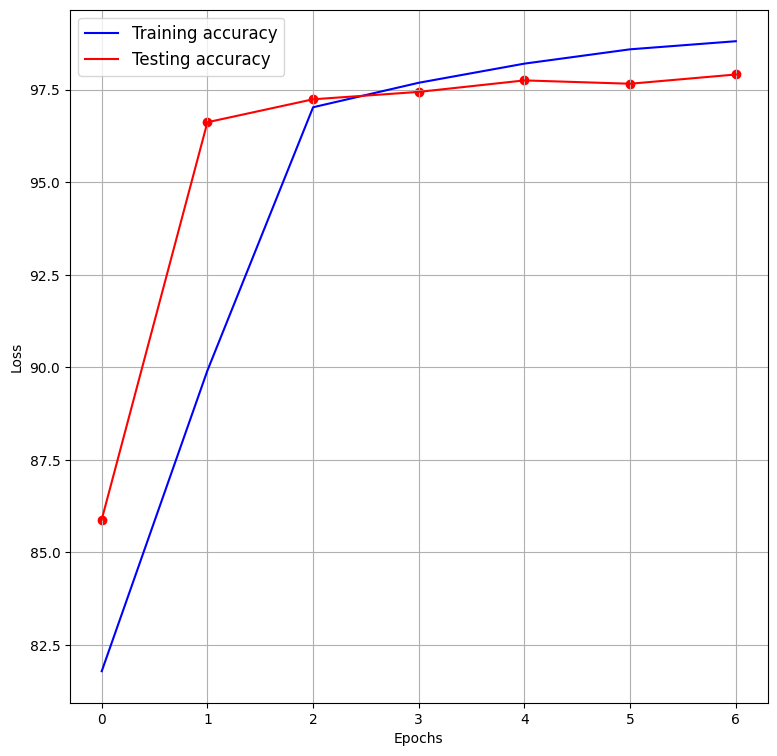

In [27]:
plt.figure(figsize=(9,9))
plt.plot(list(range(0, epochs)), train_acc, "b", label="Training accuracy")
plt.plot(list(range(0, epochs)), test_acc, "r", label="Testing accuracy")
plt.scatter(list(range(0, epochs)), test_acc, c="r", marker="o")
plt.xticks(list(range(0, epochs)))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize="large")
plt.grid(True)
plt.show()

In [28]:
# highest acc = 98.23% hidden units 256, lr = 0.1, epochs = 10, batch = 20

## Make predictions

### 1.1 Create prediciton function

In [29]:
def make_prediction(model: torch.nn.Module,
                    data: list,
                    device: torch.device=device):

  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:

      # for sample in data auto squeezes a dimension?????
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

### 1.2 Plot predicted vs actual

In [30]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=16):
  test_samples.append(sample)
  test_labels.append(label)

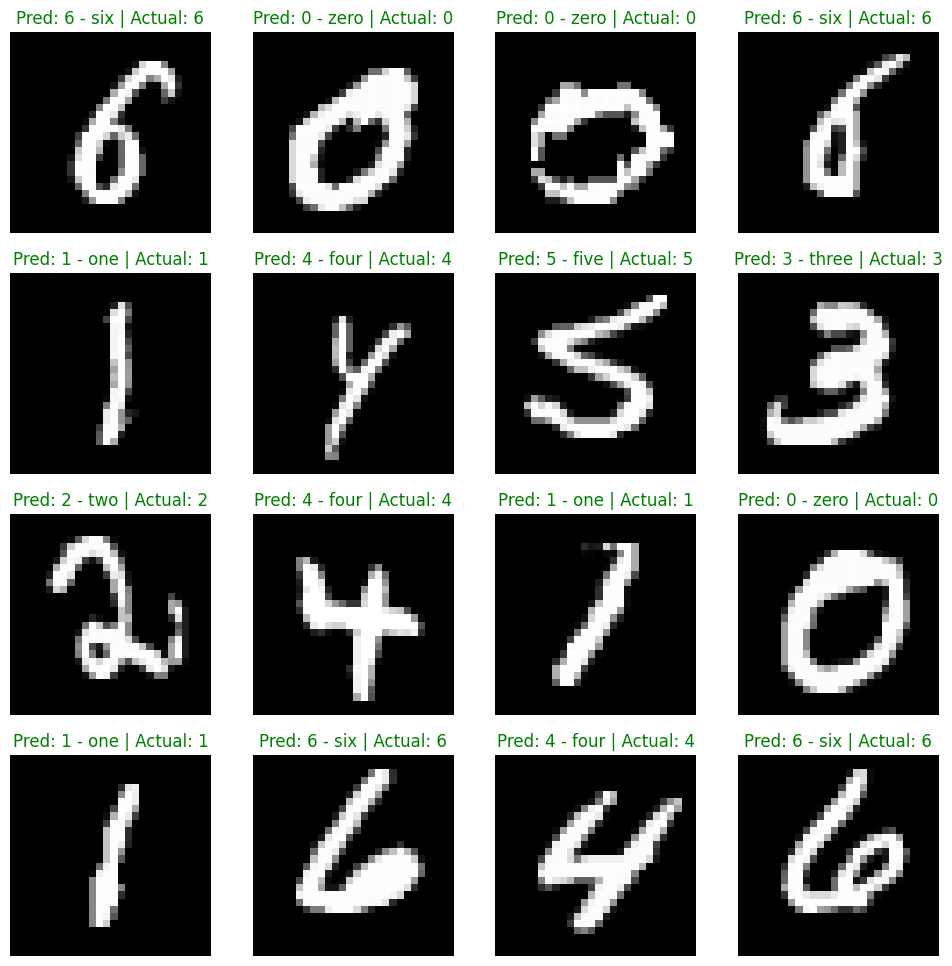

In [31]:
plt.figure(figsize=(12,12))
for i in range(0,len(test_samples)):
  pred_idx = make_prediction(model=model_1,
                             data=test_samples[i]).argmax(dim=1).item()

  plt.subplot(4,4, i+1)
  plt.imshow(X=test_samples[i].squeeze(), cmap="gray")

  if int(classes[pred_idx][0]) == test_labels[i]:
    plt.title(f"Pred: {classes[pred_idx]} | Actual: {test_labels[i]}", color="green")
  else:
    plt.title(f"Pred: {classes[pred_idx]} | Actual: {test_labels[i]}", color="red")


  plt.axis(False)

### 1.3 Make confusion matrix

In [32]:
from tqdm.auto import tqdm
from torch.nn import Softmax


y_preds = []
model_1.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."):

    X,y = X.to(device), y.to(device)

    pred_logits = model_1(X)

    m = Softmax(dim=1)
    y_pred = m(pred_logits).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)
y_preds_tensor[:5]

Making Predictions...:   0%|          | 0/400 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 4])

In [33]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:00
mlxend version: 0.23.0


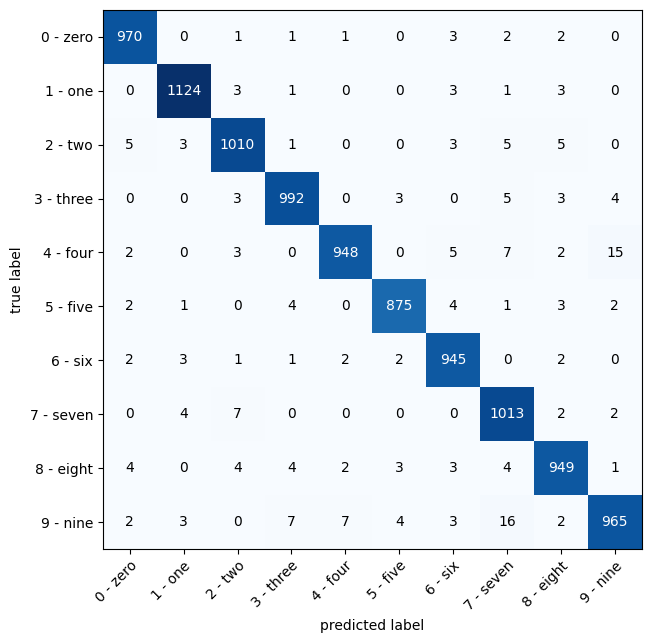

In [34]:
from torchmetrics.classification import MulticlassConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = MulticlassConfusionMatrix(num_classes=10)
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_dataset.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=classes,
                                figsize=(10,7))

In [35]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="Multiclass",
                    num_classes=len(classes))
acc_val = accuracy(y_preds_tensor,
         test_dataset.targets).item()
print(f"The test accuracy is: {acc_val*100:.2f}%")

The test accuracy is: 97.91%


In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_true=test_dataset.targets,
                            y_pred=y_preds_tensor,
                            target_names=classes))

              precision    recall  f1-score   support

    0 - zero       0.98      0.99      0.99       980
     1 - one       0.99      0.99      0.99      1135
     2 - two       0.98      0.98      0.98      1032
   3 - three       0.98      0.98      0.98      1010
    4 - four       0.99      0.97      0.98       982
    5 - five       0.99      0.98      0.98       892
     6 - six       0.98      0.99      0.98       958
   7 - seven       0.96      0.99      0.97      1028
   8 - eight       0.98      0.97      0.97       974
    9 - nine       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Creating the TinyVGG CNN

### 1.1 Model Arctiturcure
The tinyVGG model consists of 2 blocks of the following layers:
1. Conv layer
2. ReLU
3. Conv layer
4. Relu
5. Max pool

In [38]:
from torch.nn.modules.pooling import MaxPool2d
class tinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )

    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.block1(x)
    #print(f"output shape: {x.shape}")
    x = self.block2(x)
    3#print(f"output_shape: {x.shape}")
    x = self.classifier(x)
    return(x)



In [39]:
model_2 = tinyVGG(input_shape=1,
                  hidden_units=10,
                  output_shape=len(classes)).to(device)

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

In [41]:
epochs = 5
test_acc = []
train_acc = []

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} -------------")
  train_acc.append(train_step(model=model_2,
              data_loader=train_dataloader,
               loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn))
  test_acc.append(test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 -------------
Training loss: 0.29875 | Train Accuracy: 89.93%
Test loss: 0.07048 | Test Accuracy: 97.63%

Epoch: 1 -------------
Training loss: 0.07749 | Train Accuracy: 97.62%
Test loss: 0.04672 | Test Accuracy: 98.54%

Epoch: 2 -------------
Training loss: 0.06024 | Train Accuracy: 98.11%
Test loss: 0.05418 | Test Accuracy: 98.21%

Epoch: 3 -------------
Training loss: 0.05135 | Train Accuracy: 98.37%
Test loss: 0.04499 | Test Accuracy: 98.63%

Epoch: 4 -------------
Training loss: 0.04643 | Train Accuracy: 98.57%
Test loss: 0.04370 | Test Accuracy: 98.62%



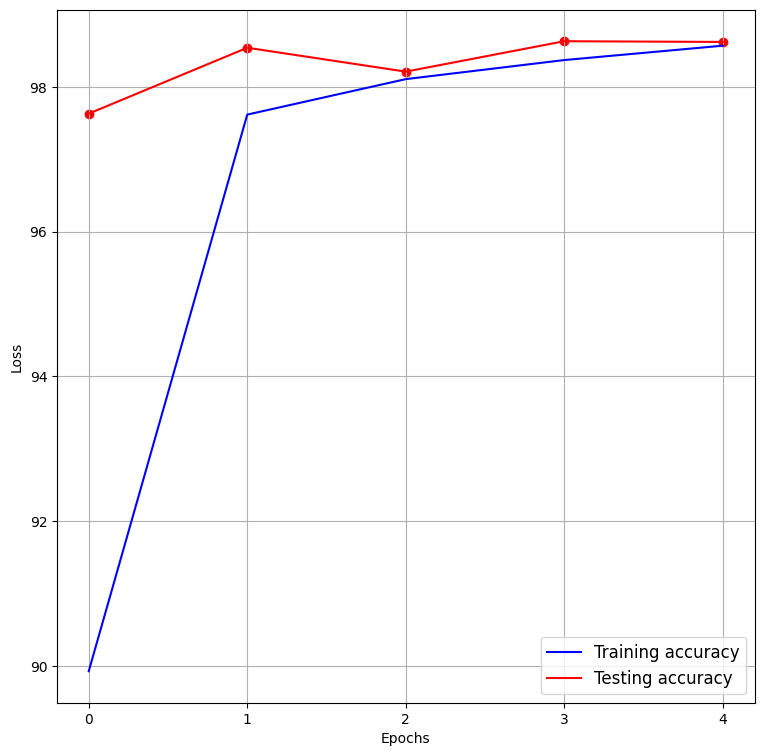

In [42]:
plt.figure(figsize=(9,9))
plt.plot(list(range(0, epochs)), train_acc, "b", label="Training accuracy")
plt.plot(list(range(0, epochs)), test_acc, "r", label="Testing accuracy")
plt.scatter(list(range(0, epochs)), test_acc, c="r", marker="o")
plt.xticks(list(range(0, epochs)))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(fontsize="large")
plt.grid(True)
plt.show()

In [43]:
y_preds = []
model_1.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making Predictions..."):

    X,y = X.to(device), y.to(device)

    pred_logits = model_2(X)

    m = Softmax(dim=1)
    y_pred = m(pred_logits).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_preds_tensor = torch.cat(y_preds)

Making Predictions...:   0%|          | 0/400 [00:00<?, ?it/s]

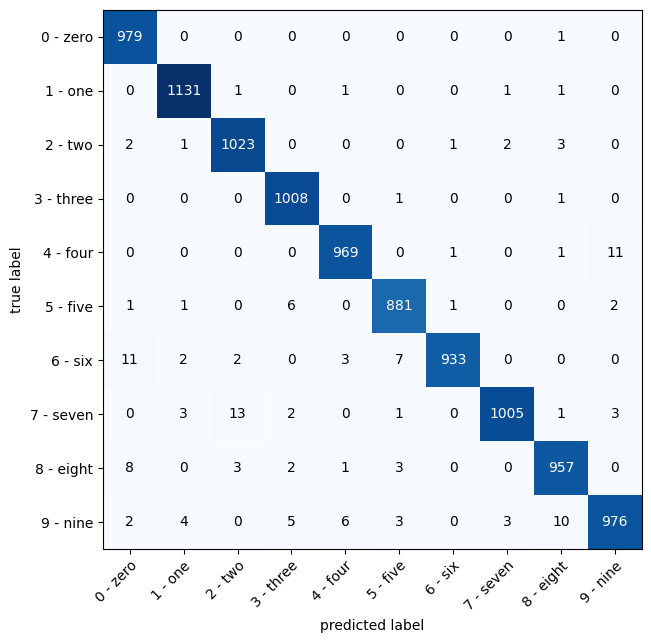

In [44]:
from torchmetrics.classification import MulticlassConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = MulticlassConfusionMatrix(num_classes=10)
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_dataset.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=classes,
                                figsize=(10,7))

In [45]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="Multiclass",
                    num_classes=len(classes))
acc_val = accuracy(y_preds_tensor,
         test_dataset.targets).item()
print(f"The test accuracy is: {acc_val*100:.2f}%")

The test accuracy is: 98.62%


In [1]:
from sklearn import svm